In [3]:
import pandas as pd 
train_data = pd.read_csv("daum_naver_sentiment.csv") 
test_data = pd.read_csv("daum_kakao_sentiment.csv")

In [6]:
%matplotlib inline 
import matplotlib.pyplot as plt

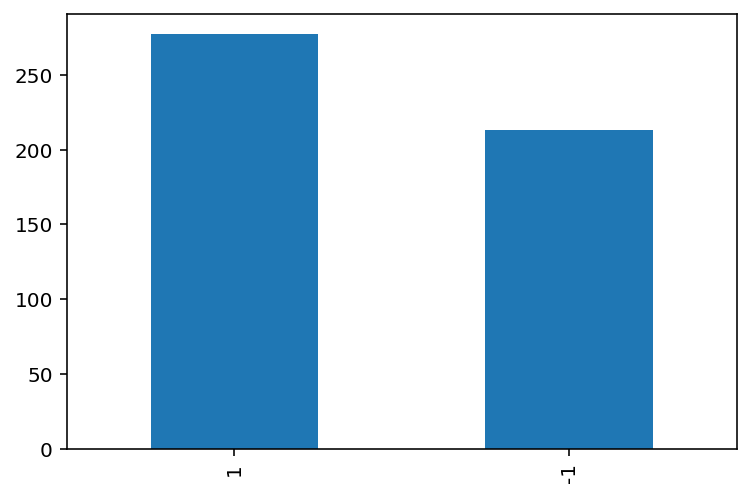

In [7]:
train_data['label'].value_counts().plot(kind='bar')

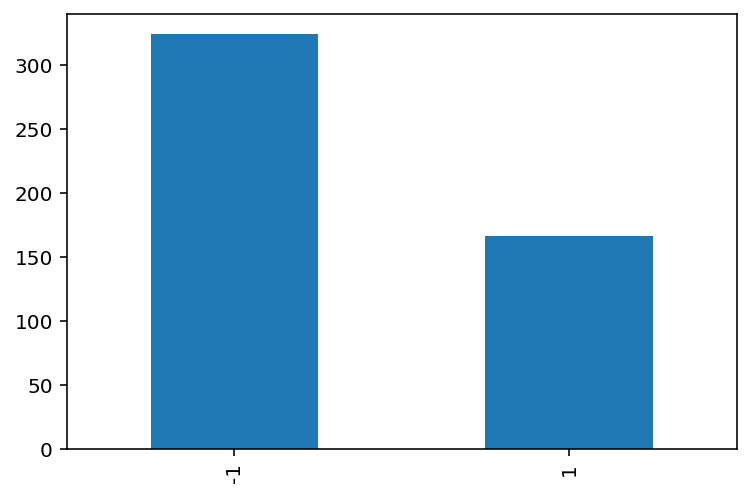

In [8]:
test_data['label'].value_counts().plot(kind='bar')

In [9]:
print(train_data.groupby('label').size().reset_index(name='count')) 
print(test_data.groupby('label').size().reset_index(name='count'))

   label  count
0     -1    213
1      1    277
   label  count
0     -1    324
1      1    166


In [41]:
stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다',',','...','..','.',"'",'?','"','!','.']

In [42]:
import konlpy 
from konlpy.tag import Okt 
okt = Okt() 
X_train = [] 
for sentence in train_data['title']:
    temp_X = [] 
    temp_X = okt.morphs(sentence, stem=True) # 토큰화 
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거 
    X_train.append(temp_X) 
    
X_test = [] 
for sentence in test_data['title']: 
    temp_X = [] 
    temp_X = okt.morphs(sentence, stem=True) # 토큰화 
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거 
    X_test.append(temp_X)

In [43]:
print(X_train[:3])

[['현대차', '주가', '7.7%', '올리다', '전기차', '전용', '플랫폼', "'..", '기대', '우려', '[', '김'], ['고', '금리', '적금', '부터', '세', '테크', '까지', '전업', '맘', '재테크', '여왕', '투자', '6', '계명'], ['롯데', '케미칼', '2', '차다', '관련', '주로', '거듭', '날', '수', '있다', '[', '주', '코', '노미', 'TV', ']']]


In [15]:
!pip install keras

In [28]:
!pip install tensorflow

  Using cached tensorflow-2.3.1-cp37-cp37m-win_amd64.whl (342.5 MB)
Processing c:\users\alal8\appdata\local\pip\cache\wheels\3f\e3\ec\8a8336ff196023622fbcb36de0c5a5c218cbb24111d1d4c7f2\termcolor-1.1.0-py3-none-any.whl
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached tensorflow_estimator-2.3.0-py2.py3-none-any.whl (459 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached grpcio-1.34.0-cp37-cp37m-win_amd64.whl (2.9 MB)
  Using cached absl_py-0.11.0-py3-none-any.whl (127 kB)
  Using cached tensorboard-2.4.0-py3-none-any.whl (10.6 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached Markdown-3.3.3-py3-none-any.whl (96 kB)
  Using cached tensorboard_plugin_wit-1.7.0-py3-none-any.whl (779 kB)
  Using cached google_auth_oauthlib-0.4.2-py2.py3-none-any.whl (18 kB)
  Using cached google_auth-1.23.0-py2.py3-none-any.whl (114 kB)
  Using cached rsa-4.6-py3-none-any.whl (47 kB)
  Using cached cachetools-4.1.1-py3-n

In [29]:
from keras.preprocessing.text import Tokenizer 
max_words = 35000 
tokenizer = Tokenizer(num_words = max_words) 
tokenizer.fit_on_texts(X_train) 
X_train = tokenizer.texts_to_sequences(X_train) 
X_test = tokenizer.texts_to_sequences(X_test)

제목의 최대 길이 :  20
제목의 평균 길이 :  12.491836734693878


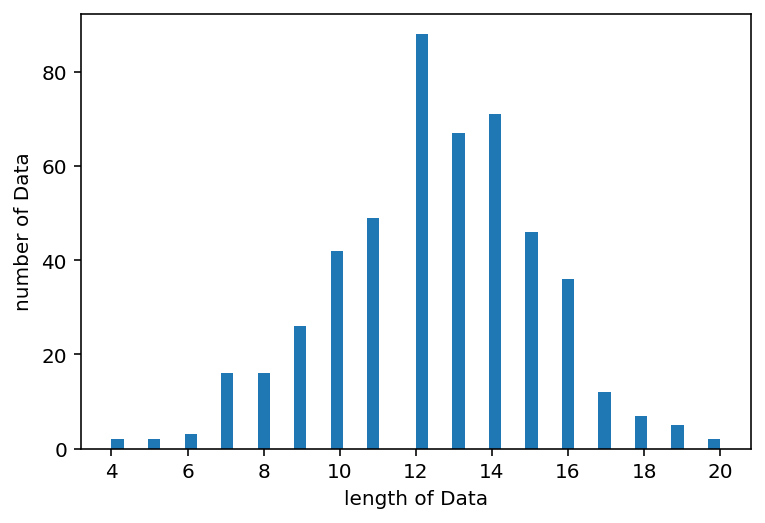

In [30]:
print("제목의 최대 길이 : ", max(len(l) for l in X_train)) 
print("제목의 평균 길이 : ", sum(map(len, X_train))/ len(X_train)) 
plt.hist([len(s) for s in X_train], bins=50) 
plt.xlabel('length of Data') 
plt.ylabel('number of Data')
plt.show()

제목의 최대 길이 :  17
제목의 평균 길이 :  7.542857142857143


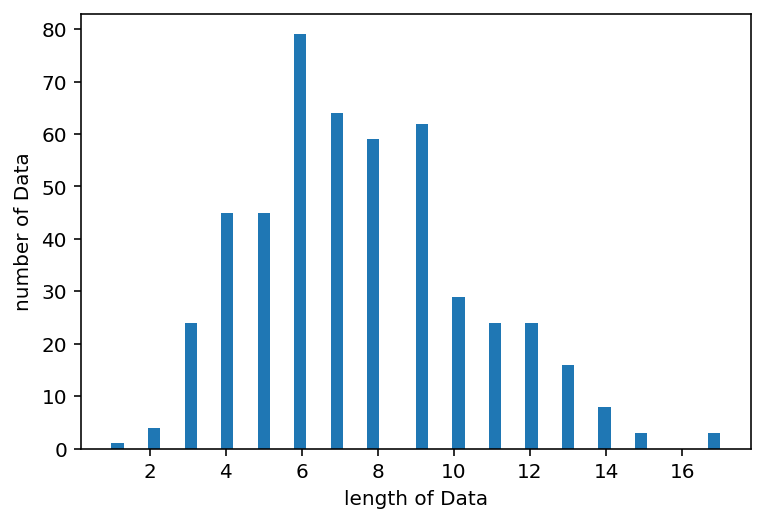

In [31]:
print("제목의 최대 길이 : ", max(len(l) for l in X_test)) 
print("제목의 평균 길이 : ", sum(map(len, X_test))/ len(X_test)) 
plt.hist([len(s) for s in X_test], bins=50) 
plt.xlabel('length of Data') 
plt.ylabel('number of Data') 
plt.show()

In [32]:
y_train = [] 
y_test = [] 

for i in range(len(train_data['label'])): 
    if train_data['label'].iloc[i] == 1: 
        y_train.append([0, 0, 1]) 
    elif train_data['label'].iloc[i] == 0: 
        y_train.append([0, 1, 0]) 
    elif train_data['label'].iloc[i] == -1: 
        y_train.append([1, 0, 0]) 
        
for i in range(len(test_data['label'])): 
    if test_data['label'].iloc[i] == 1: 
        y_test.append([0, 0, 1]) 
    elif test_data['label'].iloc[i] == 0: 
        y_test.append([0, 1, 0]) 
    elif test_data['label'].iloc[i] == -1: 
        y_test.append([1, 0, 0]) 
        
y_train = np.array(y_train) 
y_test = np.array(y_test)

In [33]:
from keras.layers import Embedding, Dense, LSTM 
from keras.models import Sequential 
from keras.preprocessing.sequence import pad_sequences 
max_len = 20 # 전체 데이터의 길이를 20로 맞춘다 
X_train = pad_sequences(X_train, maxlen=max_len) 
X_test = pad_sequences(X_test, maxlen=max_len)

In [34]:
model = Sequential() 
model.add(Embedding(max_words, 100)) 
model.add(LSTM(128)) 
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy']) 
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.1)

Epoch 1/10
45/45 [==============================] - 4s 92ms/step - loss: 0.7522 - accuracy: 0.5510 - val_loss: 0.7455 - val_accuracy: 0.4694
Epoch 2/10
45/45 [==============================] - 3s 70ms/step - loss: 0.5587 - accuracy: 0.7166 - val_loss: 0.6824 - val_accuracy: 0.5918
Epoch 3/10
45/45 [==============================] - 4s 88ms/step - loss: 0.2451 - accuracy: 0.9093 - val_loss: 0.9253 - val_accuracy: 0.6122
Epoch 4/10
45/45 [==============================] - 3s 73ms/step - loss: 0.1110 - accuracy: 0.9637 - val_loss: 0.6053 - val_accuracy: 0.7551
Epoch 5/10
45/45 [==============================] - 3s 65ms/step - loss: 0.0517 - accuracy: 0.9887 - val_loss: 0.7658 - val_accuracy: 0.7551
Epoch 6/10
45/45 [==============================] - 3s 66ms/step - loss: 0.0209 - accuracy: 0.9955 - val_loss: 1.3284 - val_accuracy: 0.7143
Epoch 7/10
45/45 [==============================] - 3s 68ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 2.8917 - val_accuracy: 0.7143
Epoch 8/10
45

In [35]:
print("\n 테스트 정확도 : {:.2f}".format(model.evaluate(X_test, y_test)[1]*100))

16/16 [==============================] - 0s 6ms/step - loss: 1.0074 - accuracy: 0.7837

 테스트 정확도 : 78.37


In [36]:
model = Sequential() 
model.add(Embedding(max_words, 100)) 
model.add(LSTM(128)) 
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.1)

Epoch 1/10
45/45 [==============================] - 6s 135ms/step - loss: 0.7940 - accuracy: 0.5306 - val_loss: 0.7447 - val_accuracy: 0.4694
Epoch 2/10
45/45 [==============================] - 5s 114ms/step - loss: 0.6072 - accuracy: 0.6893 - val_loss: 0.6925 - val_accuracy: 0.5102
Epoch 3/10
45/45 [==============================] - 4s 91ms/step - loss: 0.2421 - accuracy: 0.9002 - val_loss: 0.4215 - val_accuracy: 0.7959
Epoch 4/10
45/45 [==============================] - 4s 93ms/step - loss: 0.0537 - accuracy: 0.9841 - val_loss: 0.4068 - val_accuracy: 0.8367
Epoch 5/10
45/45 [==============================] - 4s 85ms/step - loss: 0.0224 - accuracy: 0.9909 - val_loss: 0.4728 - val_accuracy: 0.7755
Epoch 6/10
45/45 [==============================] - 4s 87ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.5810 - val_accuracy: 0.7755
Epoch 7/10
45/45 [==============================] - 5s 106ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.5785 - val_accuracy: 0.7959
Epoch 8/10

In [37]:
print("\n 테스트 정확도 : {:.2f}".format(model.evaluate(X_test, y_test)[1]*100))

16/16 [==============================] - 0s 6ms/step - loss: 0.8863 - accuracy: 0.7816

 테스트 정확도 : 78.16


In [38]:
predict = model.predict(X_test)

In [39]:
predict_labels = np.argmax(predict, axis=1) 
original_labels = np.argmax(y_test, axis=1)

In [40]:
for i in range(30): 
    print("기사제목 : ", test_data['title'].iloc[i], "/\t 원래 라벨 : ", original_labels[i], "/\t예측한 라벨 : ", predict_labels[i])

기사제목 :  한국금융지주 "카카오뱅크 주식 247억원 추가 취득" /	 원래 라벨 :  0 /	예측한 라벨 :  0
기사제목 :  카카오게임즈 "계열사 카카오브이엑스 주식 500억원에 추가취득" /	 원래 라벨 :  0 /	예측한 라벨 :  0
기사제목 :  카카오 주식 매수의견 유지, "모빌리티와 일본 웹툰사업 호조 지속" /	 원래 라벨 :  2 /	예측한 라벨 :  2
기사제목 :  한국금융지주, 카카오뱅크 주식 104만 여주 취득 /	 원래 라벨 :  0 /	예측한 라벨 :  0
기사제목 :  카카오 "카카오뱅크 주식 1676억원에 추가취득" /	 원래 라벨 :  0 /	예측한 라벨 :  0
기사제목 :  카카오 "카카오뱅크 주식 1천676억원에 추가취득" /	 원래 라벨 :  0 /	예측한 라벨 :  0
기사제목 :  카카오 "카카오뱅크 주식 추가취득..주주배정 유상증자 참여" /	 원래 라벨 :  2 /	예측한 라벨 :  0
기사제목 :  카카오 주식 시장수익률 상회 유지, "카카오톡 비즈보드 성장성 ... /	 원래 라벨 :  2 /	예측한 라벨 :  2
기사제목 :  카카오게임즈 등 49곳 주식 이달 '의무보유 물량' 해제 /	 원래 라벨 :  0 /	예측한 라벨 :  0
기사제목 :  [단독] 카카오페이증권, 국내 주식 '소수점매매' 도입 /	 원래 라벨 :  0 /	예측한 라벨 :  0
기사제목 :  "카카오 주식 풀린다"..11월, 1억5642만주 의무보유 해제 /	 원래 라벨 :  0 /	예측한 라벨 :  0
기사제목 :  [Who Is ?] 남궁훈 카카오게임즈 대표이사 /	 원래 라벨 :  0 /	예측한 라벨 :  0
기사제목 :  [2020 BEST CEO] 카카오 ‘폭풍성장’ 기획자 김범수 의장 /	 원래 라벨 :  2 /	예측한 라벨 :  2
기사제목 :  한국금융지주, 카카오뱅크에 1,700억 추가 투자 /	 원래 라벨 :  0 /	예측한 라벨 :  0
기사제목 :  카카오, 카뱅 주식 713만주 추가 취득…지분율 31.8% /